In [1]:
#!/usr/bin/env python
# coding: utf-8

import os, sys
from glob import glob

# core nltk
import nltk
from nltk.tokenize import word_tokenize

# gensim magic
import gensim
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# load saved models
crown_models = dict()
input_data = ["../models/crown-henry.w2v",
              "../models/crown-edward.w2v",
              "../models/crown-mary.w2v",
              "../models/crown-elizabeth.w2v",
              "../models/crown-james.w2v",
              "../models/crown-charles.w2v"]

for fp in input_data:
    
    model_name = os.path.basename(fp).split(".")[0]
    print("starting: {0}".format(model_name))

    crown_models[model_name] = KeyedVectors.load(fp,mmap='r')

starting: crown-henry
starting: crown-edward
starting: crown-mary
starting: crown-elizabeth
starting: crown-james
starting: crown-charles


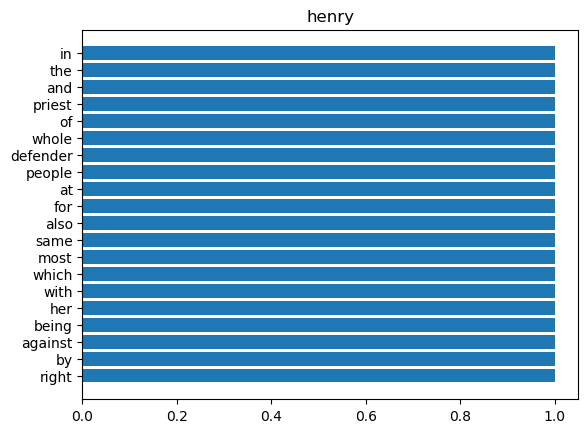

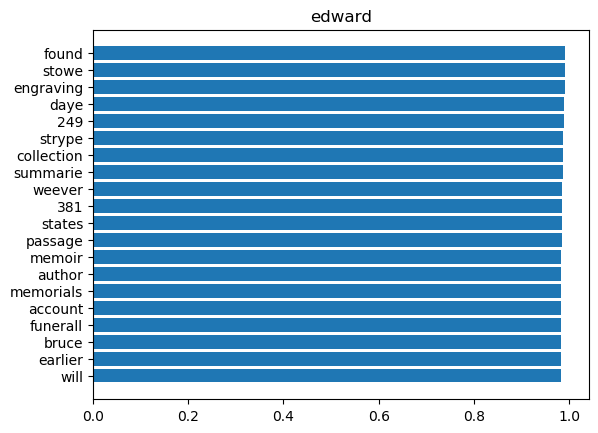

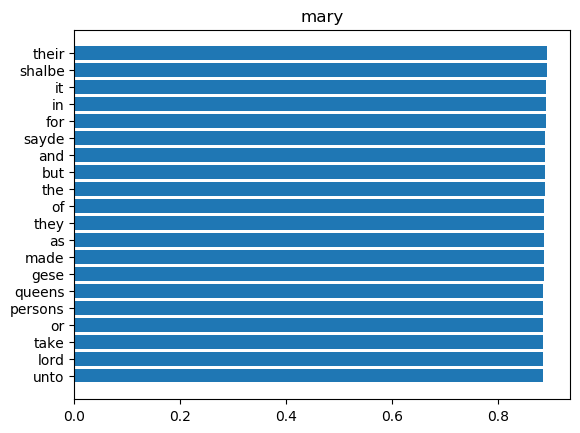

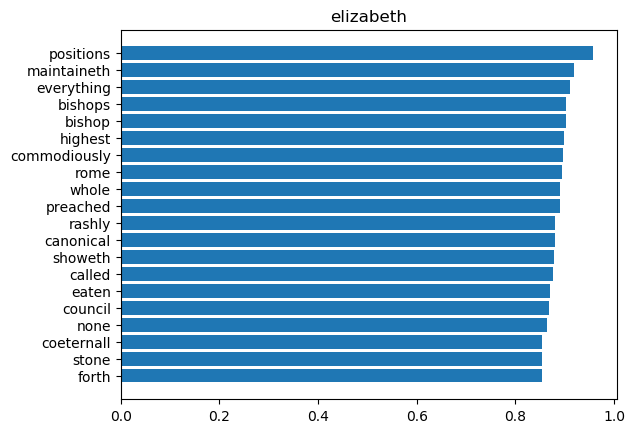

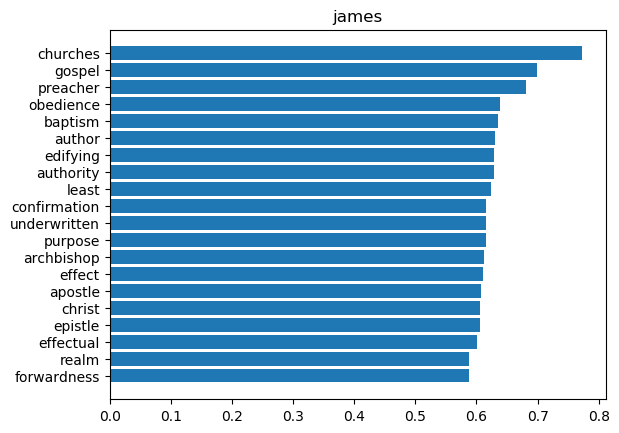

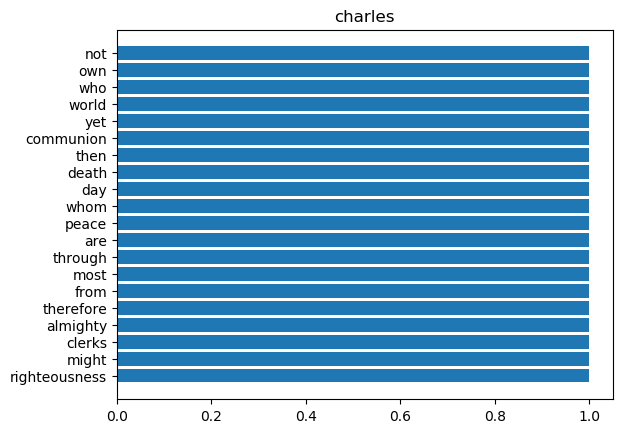

In [4]:
for d in crown_models.keys():
    sim = crown_models[d].most_similar("church",topn=20)
    title = d.replace("crown-","")
    plt.rcdefaults()
    ig, ax = plt.subplots()
    y = np.arange(len(sim))
    labels = [x[0] for x in sim]
    ax.barh(y,[x[1] for x in sim])
    ax.set_yticks(y)
    ax.set_yticklabels(labels)
    ax.invert_yaxis() 
    plt.title(title)
    plt.show()